In [1]:
from google.colab import drive
drive.mount('../content/train')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ../content/train


# New Section

This debigging enviroment is based on Google colab. This is the necessary setting for it.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import json

In [0]:
# Read logins json file. Assign the timestamp on login time and formulate the count column
with open('logins.json') as f:
   data = json.load(f)

df = pd.DataFrame(data)
df.login_time = pd.to_datetime(df.login_time, format='%Y-%m-%d %H:%M:%S')
df['count'] = df.index
df.set_index('login_time', inplace=True)

# **Part 1**

**Exploratory Data Analysis on Login Time**

We have a few findings from the analysis:

1. The huorly daily login time seems increasing with the time until the end of March. 

2. The week of maximum login time is the week of March 22, 1970 and the week of minimum login time is the last week (April 19, 1970). It may be caused by the incomplete data.

3. In the first three month, the login time increases. It reaches the maximum in March

4. In a day, the early morning is the time when fewest people login in the location.  Then more people crush into the location. At 11am, the first peak of people is reached. People in the location start to reduce in the afternoon. With the evening coming, more people. At late night and midnight (11pm-12am), the biggest peak is reached. 


5. The location sees more visitors in weekends than other week days. Most people choose Saturday and the fewest people choose Monday. The number of visitors seems increasing with the weekday passing.

6. In a month, people visiting the location seems reducing gradually. More people accessed the location before 15 than after 15


We analyzed a few. We can cerntainly find more interesting work in details. For example, we can break down into the vistors in every 15 minutes with one hour cycle or check if there is holiday impact on the login time. If we have more information, more findings would be discovered.

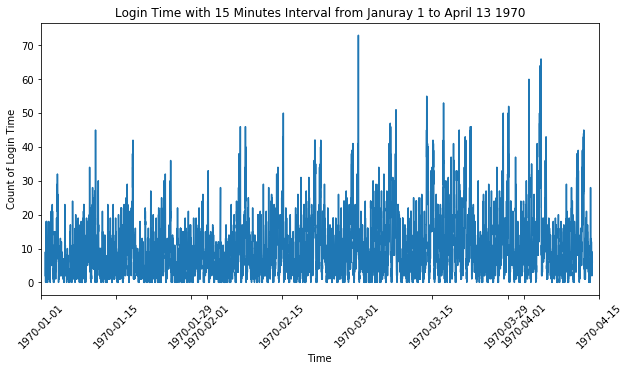

In [0]:
# Display login time count for the 15 minutes invertal. 

df_15mcount = df.resample('15T').count()

plt.figure(figsize=(10,5))
plt.plot(df_15mcount)
plt.xticks(rotation=45)
plt.xlim(left='1970-01-01', right='1970-04-15')
plt.xlabel('Time')
plt.ylabel('Count of Login Time')
plt.title('Login Time with 15 Minutes Interval from Januray 1 to April 13 1970')
plt.show()

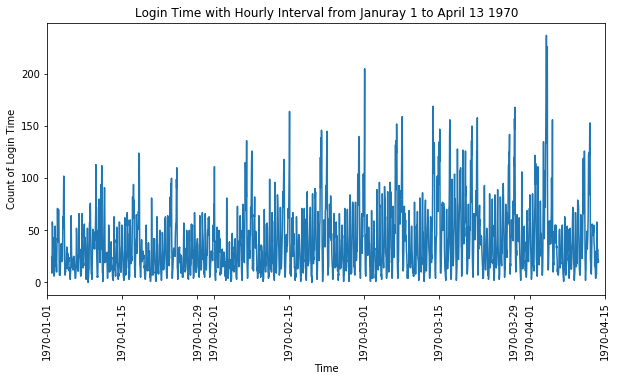

In [0]:
# Display login time count for the one hour invertal. 
df_hourcount = df.resample('1H').count()

plt.figure(figsize=(10,5))
plt.plot(df_hourcount)
plt.xticks(rotation=90)
plt.xlim(left='1970-01-01', right='1970-04-15')
plt.xlabel('Time')
plt.ylabel('Count of Login Time')
plt.title('Login Time with Hourly Interval from Januray 1 to April 13 1970')
plt.show()


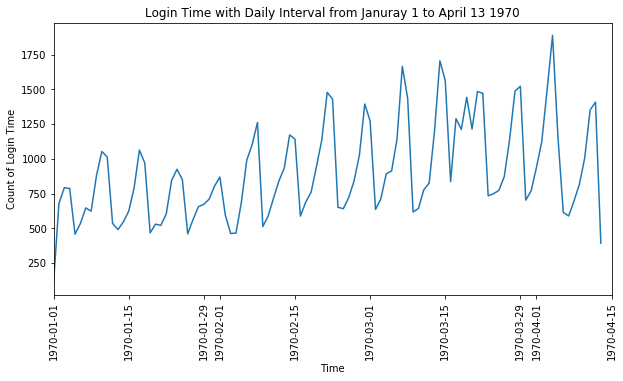

In [0]:
# # Display login time count for one day invertal. 

df_daycoount = df.resample('1D').count()

plt.figure(figsize=(10,5))
plt.plot(df_daycoount)
plt.xticks(rotation=90)
plt.xlim(left='1970-01-01', right='1970-04-15')
plt.xlabel('Time')
plt.ylabel('Count of Login Time')
plt.title('Login Time with Daily Interval from Januray 1 to April 13 1970')
plt.show()

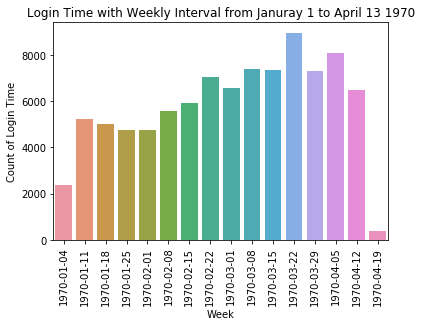

In [0]:
# Display login time for one week invertal. 

df_weekcount = df.resample('w').count().reset_index()
sns.barplot(x='login_time', y='count', data=df_weekcount)
labels = df_weekcount['login_time'].dt.date.tolist()
plt.xticks(np.arange(16, step=1), labels, rotation =90)
plt.xlabel('Week')
plt.ylabel('Count of Login Time')
plt.title('Login Time with Weekly Interval from Januray 1 to April 13 1970')

plt.show()

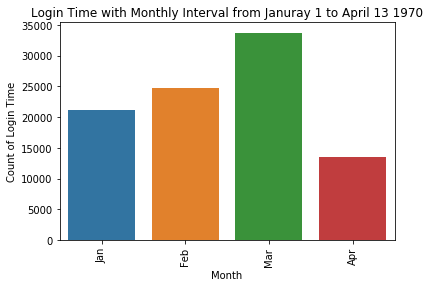

In [0]:
# Display login time for one week invertal. 

df_Monthcount = df.resample('M').count().reset_index()
sns.barplot(x='login_time', y='count', data=df_Monthcount)
plt.xticks(np.arange(4), ['Jan', 'Feb','Mar', 'Apr'], rotation =90)
plt.xlabel('Month')
plt.ylabel('Count of Login Time')
plt.title('Login Time with Monthly Interval from Januray 1 to April 13 1970')
plt.show()

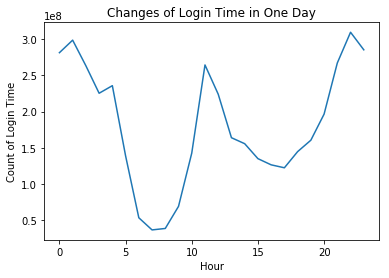

In [0]:
# Display login time for daily cycle. 

df_hourcycle = df.reset_index().groupby(df.reset_index().login_time.dt.hour).sum()

plt.plot(df_hourcycle)
plt.xlabel('Hour')
plt.ylabel('Count of Login Time')
plt.title('Changes of Login Time in One Day')

plt.show()

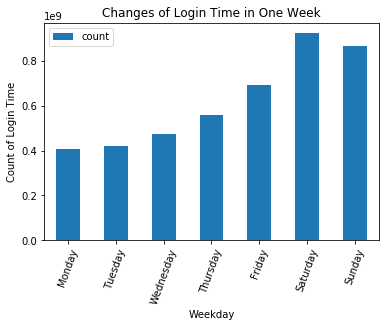

In [0]:
# Display login time for weekly cycle. 

df_weekdaycycle = df.reset_index().groupby(df.reset_index().login_time.dt.weekday).sum()

weekday_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_weekdaycycle.plot(kind='bar', y='count')
plt.xlabel('Weekday')
plt.ylabel('Count of Login Time')
plt.title('Changes of Login Time in One Week')
plt.xticks(np.arange(7), weekday_name, rotation=70)
plt.show()

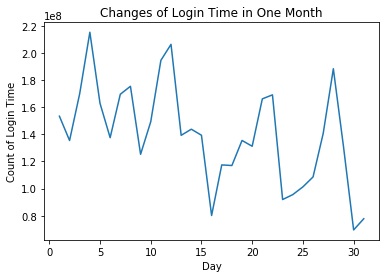

In [0]:
# Display login time for monthly cycle. 

df_daycycle = df.reset_index().groupby(df.reset_index().login_time.dt.day).sum()
plt.plot(df_daycycle)
plt.xlabel('Day')
plt.ylabel('Count of Login Time')
plt.title('Changes of Login Time in One Month')
plt.show()

# **Part 2**

**Experiment and metrics design**

***1. What  would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?***

**Answer:** 

Key measure success of this experiment is the average time per day of driver partner to go to another city. In this experiment, we assume only activity and toll would impact drivers partners' behavior. Without toll limitation, more driver partners would drive to attend more activities for both cities. So theaverage time per day of driver partner to go to another city should be improved significantly. 

***2. Describe a practical experiment you would design to compare the effectiveness of the  proposed change in relation to the key measure of success.Please provide details on:***

***a  how you will implement the experiment  
b.what statistical test(s) you will conduct to verify the significance of the observation  
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.***

**Answer:** 

Expriement Implementation:

a. We can randomly select 1000 driver partner individually from two cities to form a group and split into two groups evenly. Every group has same number of driver partners from each city. A group is not subsidized at all and B group are totally reimbursed. Their driving time would be reported. Then we would compare if the average time per day is changing significantly. 


b. We select the T-test because our sample is greater than 30 and is randomly selected. The scale of measurement is continous. And the distribution of data must be normal distribution. The last assumption is the homogeneity of variance. We need to check if the homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal. 

Null Hypothesis(H0): Average time per day of commuting is equal among those two groups
Alternative Hypothesis(H1):  Average time per day of commuting is significantly different among these two groups.

Then we perform the t-test on the data we collected. 

c. If the p-value is greater than 0.05, we fail to reject the null hypothesis That means we do not have encough evidence against it.

If the p-value is less than 0.05, we reject Null hypothesis and accept the alternative hypothesis. That means there is big great impact of free toll on driver partners' driving behavior.

If the Null hypothesis fails to be rejected, the city operations team might also consider other factors in impacting the exclusion of driver partners, such as traffic, activity, social consciousness etc. These factors might outweigh free toll. 

# **Part 3**

**Predictive  modeling**

See the Answer below



In [0]:
# read json file to pandas dataframe

with open('ultimate_data_challenge.json') as f:
   data = json.load(f)

df = pd.DataFrame(data)

***Data Exploration and Visualization***

*1. Perform any cleaning, exploratory analysis, and/or visualizations to    use     the    provided  data     for     this    analysis     (a     few     sentences/plots    describing     your    approach    will     suffice).    What  fraction     of     the    observed     users    were     retained?* 

**Answer: **Fraction of retained users is 0.3651. 

I check the dataset, drop duplicates, then visualize the data first. Some outliers can be identified and removed. The output is assigned and irrelavent columns are dropped. Small portion of missing values are dropped and other missing values are filled with mean values.  

In [0]:
# Check the dataframe. There are categorical and numerical inputs. 
# Some missing and duplicated values exist in the dataframe. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [0]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [0]:
df[df.duplicated()]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
2608,6.25,5.0,5.0,1.0,Astapor,2014-01-19,iPhone,2014-01-18,0.0,1,True,0.0
18057,2.33,5.0,5.0,1.0,Astapor,2014-01-11,iPhone,2014-01-11,0.0,1,True,0.0
29601,8.08,5.0,NaN,1.0,Winterfell,2014-01-02,Android,2014-01-01,0.0,1,False,100.0
34641,1.44,5.0,NaN,1.0,Winterfell,2014-01-19,iPhone,2014-01-18,0.0,1,True,0.0
36627,3.54,5.0,5.0,1.0,Winterfell,2014-01-19,Android,2014-01-18,0.0,1,False,0.0
39601,0.00,5.0,5.0,1.0,Winterfell,2014-01-11,Android,2014-01-10,0.0,1,False,100.0
42025,0.01,5.0,NaN,1.0,Winterfell,2014-01-19,Android,2014-01-18,0.0,1,False,0.0
45416,3.06,5.0,5.0,1.0,Astapor,2014-01-20,iPhone,2014-01-20,0.0,1,False,100.0


In [0]:
# After removing the duplicated values, we assign the output "retention" value. 
# The data of last trip date in June is marked as 1 while others are marked as 1. Drop the last trip date column

df = df.drop_duplicates().reset_index(drop=True)

df['retention'] = 0

df.loc[df['last_trip_date'].str.contains('2014-06'),'retention'] = 1

df.drop('last_trip_date', axis=1, inplace=True)

*Visualization*  

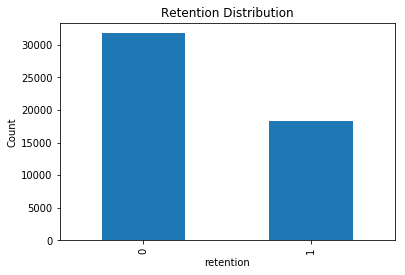

In [0]:
df1 = df.groupby('retention')['city'].count()
df1.plot(kind='bar', y='city')
plt.ylabel('Count')
plt.title('Retention Distribution')
plt.show()

In [0]:
print('Fraction of Retained Users:', df1[1]/(df1[1]+df1[0]))

Fraction of Retained Users: 0.36517842854856775


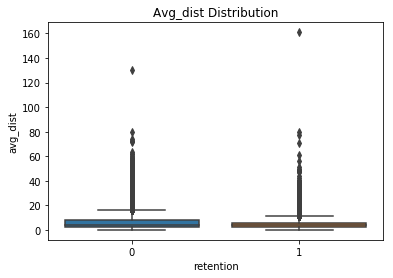

In [0]:
sns.boxplot(x='retention', y='avg_dist', data=df)
plt.title('Avg_dist Distribution')
plt.show()

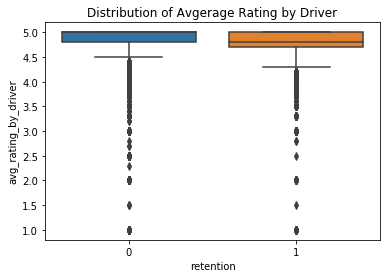

In [0]:
sns.boxplot(x='retention', y='avg_rating_by_driver', data=df)
plt.title('Distribution of Avgerage Rating by Driver')
plt.show()

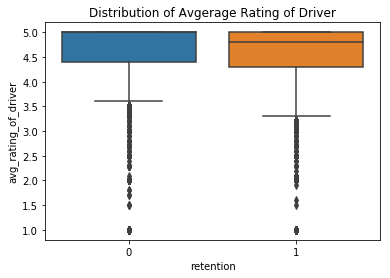

In [0]:
sns.boxplot(x='retention', y='avg_rating_of_driver', data=df)
plt.title('Distribution of Avgerage Rating of Driver')
plt.show()

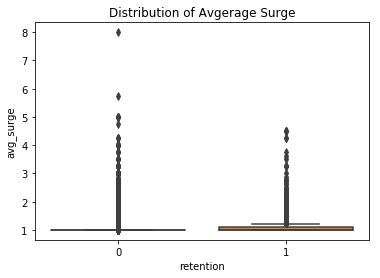

In [0]:
sns.boxplot(x='retention', y='avg_surge', data=df)
plt.title('Distribution of Avgerage Surge')
plt.show()

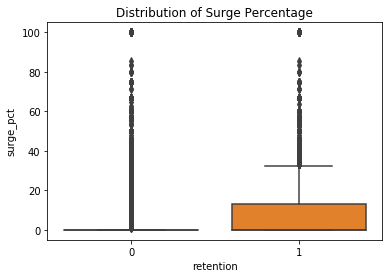

In [0]:
sns.boxplot(x='retention', y='surge_pct', data=df)
plt.title('Distribution of Surge Percentage')
plt.show()

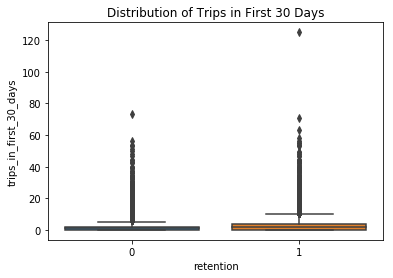

In [0]:
sns.boxplot(x='retention', y='trips_in_first_30_days', data=df)
plt.title('Distribution of Trips in First 30 Days')
plt.show()

In [0]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'city',
       'phone', 'signup_date', 'surge_pct', 'trips_in_first_30_days',
       'ultimate_black_user', 'weekday_pct', 'retention'],
      dtype='object')

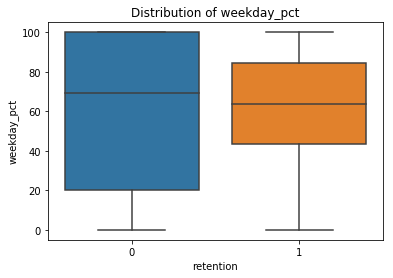

In [0]:
sns.boxplot(x='retention', y='weekday_pct', data=df)
plt.title('Distribution of weekday_pct')
plt.show()

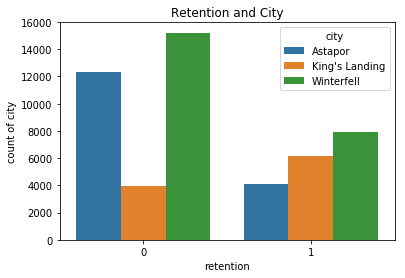

In [0]:
df1 = df.groupby(['city', 'retention'])['phone'].count().reset_index()
sns.barplot(x='retention', y='phone', hue='city', data=df1)
plt.ylabel('count of city')
plt.title('Retention and City')
plt.show()

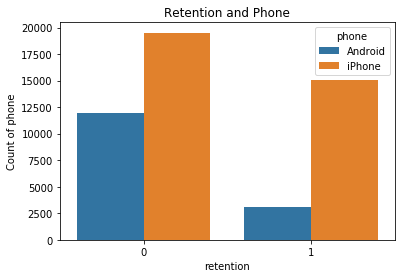

In [0]:
df1 = df.groupby(['phone', 'retention'])['city'].count().reset_index()

sns.barplot(x='retention', y='city', hue='phone', data=df1)
plt.ylabel('Count of phone')
plt.title('Retention and Phone')
plt.show()

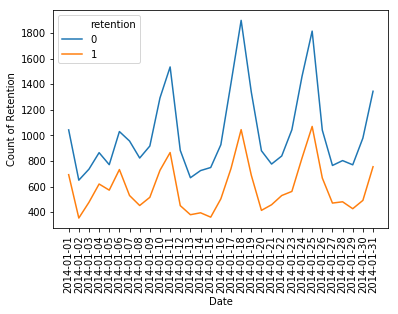

In [0]:
df1 = df.groupby(['retention', 'signup_date'])['city'].count().reset_index()
sns.lineplot(x='signup_date', y='city', hue='retention', data=df1)

plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Count of Retention')
plt.show()

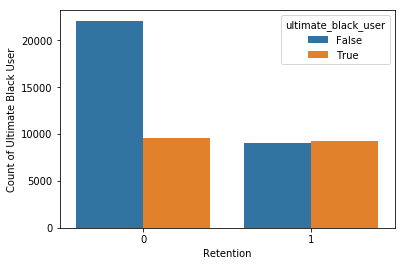

In [0]:
df1 = df.groupby(['retention', 'ultimate_black_user'])['city'].count().reset_index()

sns.barplot(x='retention', y='city',hue='ultimate_black_user', data=df1)
plt.xlabel('Retention')
plt.ylabel('Count of Ultimate Black User')
plt.show()

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49992 entries, 0 to 49991
Data columns (total 12 columns):
avg_dist                  49992 non-null float64
avg_rating_by_driver      49791 non-null float64
avg_rating_of_driver      41873 non-null float64
avg_surge                 49992 non-null float64
city                      49992 non-null int64
phone                     49596 non-null object
signup_date               49992 non-null object
surge_pct                 49992 non-null float64
trips_in_first_30_days    49992 non-null int64
ultimate_black_user       49992 non-null bool
weekday_pct               49992 non-null float64
retention                 49992 non-null int64
dtypes: bool(1), float64(6), int64(3), object(2)
memory usage: 4.2+ MB


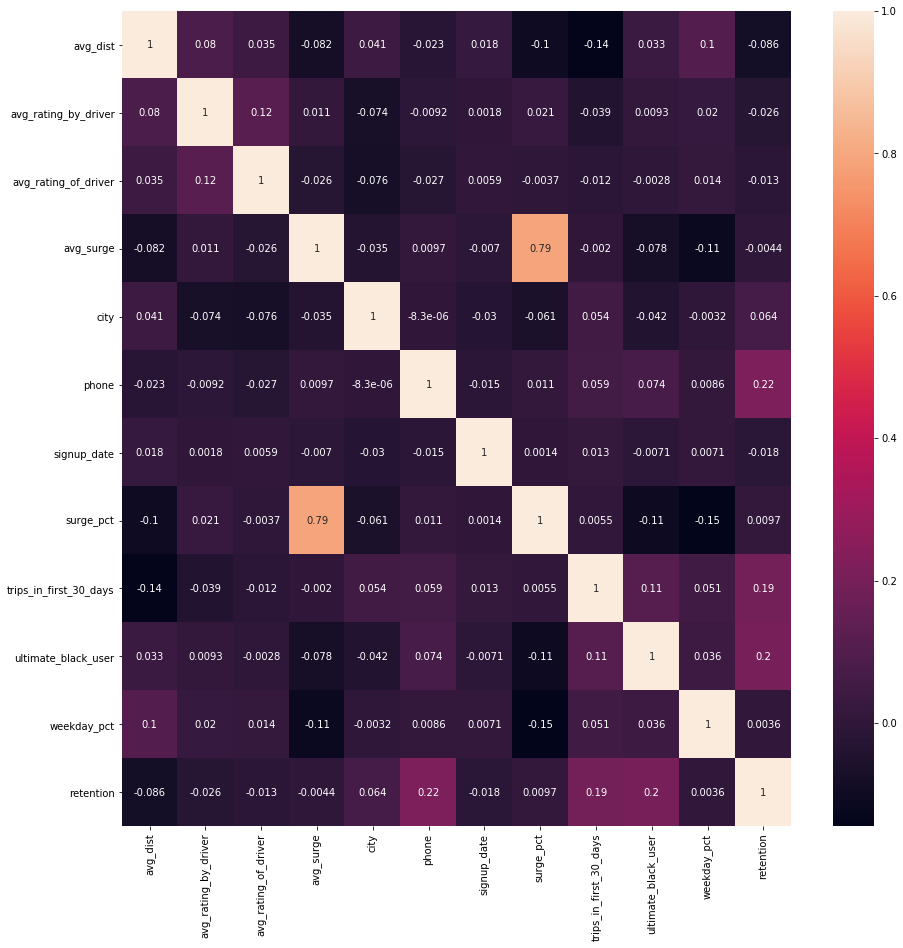

In [21]:
# plot feature heatmap and discover more correlation between parameters

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df.dropna(subset=['phone'], inplace=True)
df1 = df.copy()

cats = ['city', 'phone', 'signup_date', 'ultimate_black_user']

for cat in cats:
  df1[cat] = le.fit_transform(df1[cat])

corrmat = df1.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrmat, annot=True)
plt.show()

In [0]:
# We remove some outliers from the grahs above, drop rows from missing values of phone
# Fill other missing values with mean values
# Drop avg_surge column since it is highly correlated with surge_pct



df = df[((df['avg_dist'] - df['avg_dist'].mean())/df['avg_dist'].std()).abs() < 3] 
df = df[((df['avg_surge'] - df['avg_surge'].mean())/df['avg_surge'].std()).abs() < 3]
df = df[((df['trips_in_first_30_days'] - df['trips_in_first_30_days'].mean())/
         df['trips_in_first_30_days'].std()).abs() < 3]
#df.dropna(subset=['phone'], inplace=True)
df['avg_dist'].fillna(df['avg_dist'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df.drop(['avg_surge'], axis=1, inplace=True)

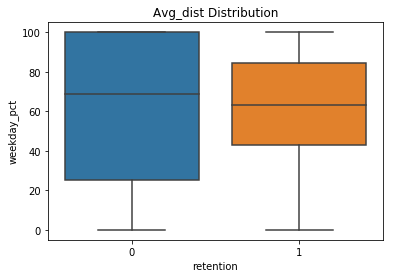

In [23]:
sns.boxplot(x='retention', y='weekday_pct', data=df)
plt.title('Avg_dist Distribution')
plt.show()

In [0]:
# Sort numerical columns out. Prepare the input X and output y

from sklearn.model_selection import train_test_split

num = list(set(df.columns) - set(cats) - set(['retention']))
X = df[num+cats]
y = df['retention']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

*Featuring Engineering and Model Building*

*2. Build    a    predictive     model     to     help    Ultimate    determine    whether    or    not    a    user    will    be    active  in     their    6th    month     on     the     system.    Discuss    why     you     chose     your    approach,    what  alternatives     you     considered,     and    any     concerns     you    have.    How     valid     is     your    model?  Include    any     key     indicators    of     model    performance.*  

**Answer:** My approach is to firstly build a pipeline with feature engineering and model building, then try three different models(Logistic Regression is the baseline). These models are fast,  easy for execution and interpretable. Of course, other feature selection, engineering method and more complex models, such as AdaBoosting or XGBoosting can be on trial. Although more complex models might produce more accurate resullts, they might be easy to interpret and run slowly.

The random forest is the best one. All scores(accuracy, precision, recall and f1score) are higher than other two models. The testing score (accuracy) is 0.7458. F1 score is 0.61. 


In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_score


class ML_Model:
  
  def __init__(self, X_trn, X_tst, y_trn, y_tst): 
    'This model include two functions: build a pipeline of featuring and model and display the performance'
    
    self.X_trn = X_trn
    self.X_tst = X_tst
    self.y_trn = y_trn
    self.y_tst = y_tst

  def pipe(self, model, numerical, categorical):
    # Building a pipleline for featuring engineering and modelling

    
    numeric_transformer = Pipeline(steps=[('scaler', preprocessing.MinMaxScaler())])
    
    categorical_transformer = Pipeline(steps=[
    ('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))])

    # Build a transformer
    preprocessor = ColumnTransformer(
      transformers=[
        ('num', numeric_transformer, numerical),
        ('cat', categorical_transformer, categorical)])

    # Append classifier to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    return Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])
    

  def metric(self, model):    
    
    # Display the cross validation score of model
    cross_score = cross_val_score(model, self.X_trn, self.y_trn, cv=5, scoring='accuracy')
    
    model.fit(self.X_trn, self.y_trn)
    
    # Create the confusion matrix and display it in heatmap
    cm = confusion_matrix(self.y_tst, model.predict(self.X_tst))
        
    sns.heatmap(cm, annot=True)
    plt.show()
    
    # Calculate the Precision, recall, f1 score
    tn, fp, fn, tp = cm.ravel()
    precision = tp/(tp + fp)    
    recall = tp/(tp + fn)    
    f1_score = 2* precision * recall/(precision + recall)
    
    
    print('Cross Validation Score:', cross_score)                    
    print('Accuracy:', (tn + tp)/(tn + fp + fn + tp))    
    print('Precision:', precision)    
    print('Recall:', recall)    
    print('f1 score:', f1_score)
    
    # Display the roc curve    
    model_roc_auc = roc_auc_score(self.y_tst, model.predict(self.X_tst))
    fpr, tpr, _ = roc_curve(self.y_tst, model.predict_proba(self.X_tst)[::,1])
    
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.plot(fpr, tpr, label=model_roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.show()
    
    return model



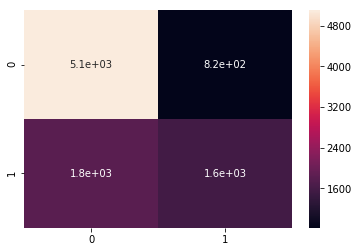

Cross Validation Score: [0.71622713 0.71380517 0.71672722 0.70488494 0.72139973]
Accuracy: 0.7171151776103337
Precision: 0.655157894736842
Recall: 0.462407132243685
f1 score: 0.5421602787456445


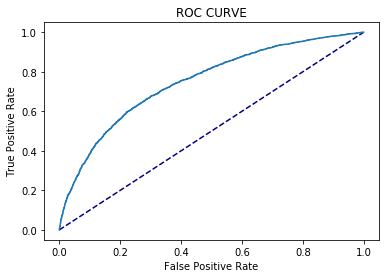

In [31]:
# Try Logistic Regression, Multinomial Naive Bayes and Random Forest classifier

ml = ML_Model(X_train, X_test, y_train, y_test)
lg_clf = ml.pipe(LogisticRegression(solver='lbfgs'), num, cats)
lg_model = ml.metric(lg_clf)

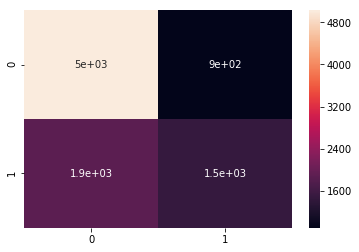

Cross Validation Score: [0.70169537 0.70129171 0.70811465 0.69829094 0.70942127]
Accuracy: 0.7016146393972013
Precision: 0.6241105064880703
Recall: 0.4430906389301634
f1 score: 0.5182481751824817


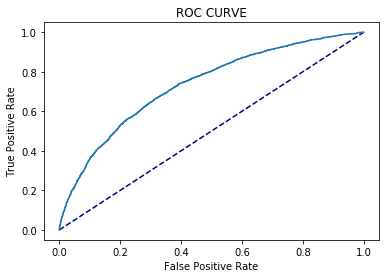

In [32]:
from sklearn.naive_bayes import MultinomialNB

mnb_clf = ml.pipe(MultinomialNB(), num, cats)
mnb_model = ml.metric(mnb_clf)

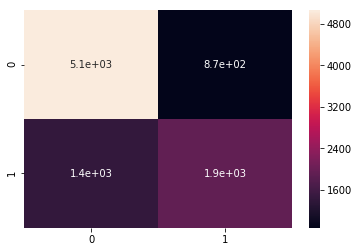

Cross Validation Score: [0.7439451  0.74031216 0.74283407 0.73475979 0.74535666]
Accuracy: 0.7519913885898816
Precision: 0.6898032200357782
Recall: 0.5729569093610698
f1 score: 0.625974025974026


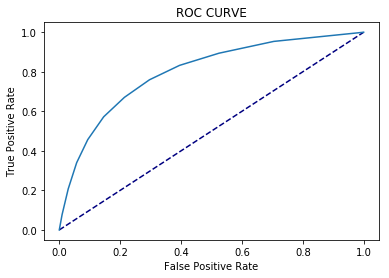

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = ml.pipe(RandomForestClassifier(n_estimators=10), num, cats)
rf_model = ml.metric(rf_clf)


*3. Briefly    discuss    how     Ultimate     might     leverage     the     insights    gained     from     the    model     to  improve     its     long  term     rider     retention     (again,    a     few     sentences    will     suffice).* 

**Answer**: 

From the picture below, top 3 features are avg_dist, weekday_pct and avg_rating_by_rider. Retained users are inclined to have shorter average distance, weekday percentage with shorter range and lower average rating by driver. From the model, we have target customer profile. Ultimate might launch marketing compaign, improve customer experience or other ways to retain this segmentation and convert more non-retainers to retainers

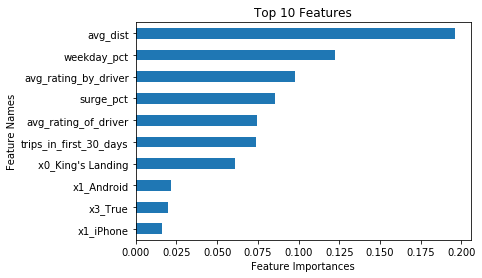

In [34]:
# Find top 10 features for Random Forest Classifier 

feature_importances = rf_model.named_steps['classifier'].feature_importances_
feature = np.concatenate([np.array(num), 
                          rf_model.named_steps['preprocessor'].transformers_[1][1].\
                          named_steps['onehot'].get_feature_names()])
feat_plot = pd.Series(feature_importances, index=feature)
feat_plot.nlargest(10).sort_values().plot(kind='barh')

plt.xlabel('Feature Importances')
plt.ylabel('Feature Names')
plt.title('Top 10 Features')
plt.show()